In [37]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder 
from sklearn import datasets, model_selection, linear_model, ensemble,neighbors 
from sklearn.metrics import mean_squared_error,accuracy_score 
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC 
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.ensemble import RandomForestClassifier 
from xgboost import plot_importance 
from xgboost import XGBClassifier
import plotly.graph_objs as go
import plotly.express as px

In [28]:
df = pd.read_csv('final_fire_weather_7yr.csv') 
df.head(3)

산불발생여부 발생장소_시도       관측일   평균기온  일최고기온   일최고기온시각  일최저기온   일최저기온시각  \
0       0      강원  20140101  3.631  6.362  1403.385 -0.331   713.154   
1       0      경북  20140101  4.907  8.686  1382.286 -0.264   764.500   
2       0      경북  20140102  2.379  8.664  1398.071 -2.579  1727.643   

    일평균현지기압   일최고현지기압  ...  일최대순간풍속시각  일최대순간풍속풍향       풍정합  일평균전운량  일평균중하층운량  \
0   985.015   988.123  ...   1421.538    256.923  3449.692   2.850     2.683   
1   998.207  1000.529  ...   1350.143    277.857  3067.286   2.075     2.075   
2  1004.921  1006.907  ...    997.714    288.571  1984.714   2.600     1.125   

   최다운량  최다운량시각  일합계일조시간  일합계일사량  일평균지면온도  
0  8.00  1450.0    6.069   6.922    0.131  
1  6.25  1600.0    7.121   9.260    1.671  
2  6.00  1825.0    8.171   9.880    1.193  

[3 rows x 41 columns]

In [29]:
df.columns

Index(['산불발생여부', '발생장소_시도', '관측일', '평균기온', '일최고기온', '일최고기온시각', '일최저기온',
       '일최저기온시각', '일평균현지기압', '일최고현지기압', '일최고현지기압시각', '일최저현지기압', '일최저현지기압시각',
       '일평균해면기압', '일최고해면기압', '일최고해면기압시각', '일최저해면기압', '일최저해면기압시각', '일평균상대습도',
       '일최소상대습도', '일최소상대습도시각', '일평균수증기압', '일최고수증기압', '일최고수증기압시각', '일최저수증기압',
       '일최저수증기압시각', '일평균풍속', '일최대풍속', '일최대풍속시각', '일최대풍속풍향', '일최대순간풍속',
       '일최대순간풍속시각', '일최대순간풍속풍향', '풍정합', '일평균전운량', '일평균중하층운량', '최다운량', '최다운량시각',
       '일합계일조시간', '일합계일사량', '일평균지면온도'],
      dtype='object')

In [30]:
df.drop(['일최고기온시각','일최저기온시각','일최고현지기압시각','일최저현지기압시각', '일최고해면기압시각','일최저해면기압시각','일최소상대습도시각','일최고수증기압시각','일최저수증기압시각','일최대풍속시각','일최대순간풍속시각','최다운량시각'], axis=1, inplace=True)

In [31]:
df=df.rename(columns={'산불발생여부':'fire','발생장소_시도':'location', '관측일':'Date', 
    '평균기온':'avgT','일최고기온':'dayMaxT','일최저기온':'dayMinT',
    '일평균현지기압':'dayAvgP', '일최고현지기압':'dayMaxP', '일최저현지기압':'dayMinP',
    '일평균해면기압':'dayAvgPsea','일최고해면기압':'dayMaxPsea',
    '일최저해면기압':'dayMinPsea','일평균상대습도':'dayAvgRhm',
    '일최소상대습도':'dayMinRhm','일평균수증기압':'dayAvgWaterP',
    '일최고수증기압':'dayMaxWaterP','일최저수증기압':'dayMinWaterP',
    '일평균풍속':'dayAvgWS','일최대풍속':'dayMaxWS','일최대풍속풍향':'dayMaxWSWD','일최대순간풍속':'dayMaxInsWS',
    '일최대순간풍속풍향':'dayMaxInsWSWD','풍정합':'hr24sumRws',
    '일평균전운량':'dayAvgCloud','일평균중하층운량':'dayAvgMiddleLowCloud','최다운량':'maxCloud',
    '일합계일조시간':'sumSS_hr','일합계일사량':'daySumSunRay',
    '일평균지면온도':'dayAvgGroundT'})

In [32]:
df.drop(['location', 'Date'], axis=1, inplace=True)

In [33]:
#df.to_csv('0722_revised_var.csv', index=False)

In [34]:
df.columns

Index(['fire', 'avgT', 'dayMaxT', 'dayMinT', 'dayAvgP', 'dayMaxP', 'dayMinP',
       'dayAvgPsea', 'dayMaxPsea', 'dayMinPsea', 'dayAvgRhm', 'dayMinRhm',
       'dayAvgWaterP', 'dayMaxWaterP', 'dayMinWaterP', 'dayAvgWS', 'dayMaxWS',
       'dayMaxWSWD', 'dayMaxInsWS', 'dayMaxInsWSWD', 'hr24sumRws',
       'dayAvgCloud', 'dayAvgMiddleLowCloud', 'maxCloud', 'sumSS_hr',
       'daySumSunRay', 'dayAvgGroundT'],
      dtype='object')

In [35]:
df2=df[['fire','avgT', 'dayMaxT', 'dayMinT', 'dayAvgP',
       'dayMaxP', 'dayMinP', 'dayAvgPsea', 'dayMaxPsea', 'dayMinPsea',
       'dayAvgRhm', 'dayMinRhm', 'dayAvgWaterP', 'dayMaxWaterP',
       'dayMinWaterP', 'dayAvgWS', 'dayMaxWS', 'dayMaxWSWD', 'dayMaxInsWS',
       'dayMaxInsWSWD', 'hr24sumRws', 'dayAvgCloud', 'dayAvgMiddleLowCloud',
       'maxCloud', 'sumSS_hr', 'daySumSunRay', 'dayAvgGroundT']]

In [36]:
df2['avgT'].describe()

count    5502.000000
mean       12.274544
std         9.462959
min       -13.993000
25%         3.937750
50%        13.029000
75%        20.407000
max        31.279000
Name: avgT, dtype: float64

<AxesSubplot:xlabel='avgT_bins'>

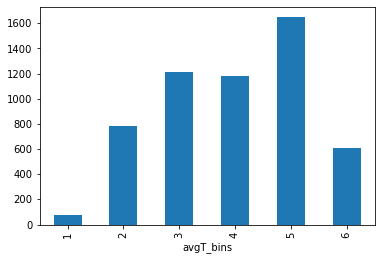

In [43]:
#numpy-histogram
#전체 개수를 구간을 분할해서 보여줌
cnt,bins=np.histogram(df.avgT, bins=6)
cnt,bins
#pandas-cut
df['avgT_bins']=pd.cut(x=df.avgT,bins=bins,
                     labels=['1','2','3','4','5','6'],
                     include_lowest=True)
df.avgT_bins
df.groupby(['avgT_bins'])['fire'].count().plot(kind='bar')

<AxesSubplot:xlabel='dayMaxT_bins'>

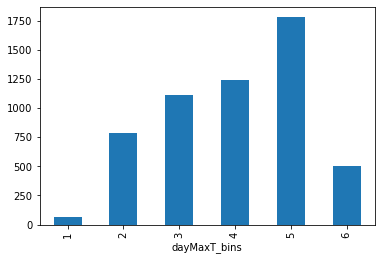

In [44]:
cnt,bins=np.histogram(df.dayMaxT, bins=6)
cnt,bins

df['dayMaxT_bins']=pd.cut(x=df.dayMaxT,bins=bins,
                     labels=['1','2','3','4','5','6'],
                     include_lowest=True)
df.dayMaxT_bins
df.groupby(['dayMaxT_bins'])['fire'].count().plot(kind='bar')

<AxesSubplot:xlabel='dayMinT_bins'>

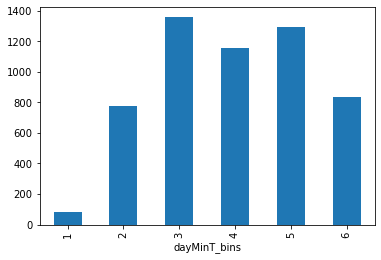

In [45]:
cnt,bins=np.histogram(df.dayMinT, bins=6)
cnt,bins

df['dayMinT_bins']=pd.cut(x=df.dayMinT,bins=bins,
                     labels=['1','2','3','4','5','6'],
                     include_lowest=True)
df.dayMinT_bins
df.groupby(['dayMinT_bins'])['fire'].count().plot(kind='bar')

<AxesSubplot:xlabel='dayAvgP_bins'>

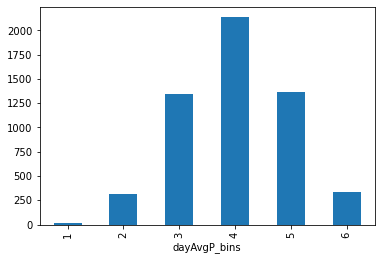

In [46]:
cnt,bins=np.histogram(df.dayAvgP, bins=6)
cnt,bins

df['dayAvgP_bins']=pd.cut(x=df.dayAvgP,bins=bins,
                     labels=['1','2','3','4','5','6'],
                     include_lowest=True)
df.dayAvgP_bins
df.groupby(['dayAvgP_bins'])['fire'].count().plot(kind='bar')

<AxesSubplot:xlabel='dayMaxP_bins'>

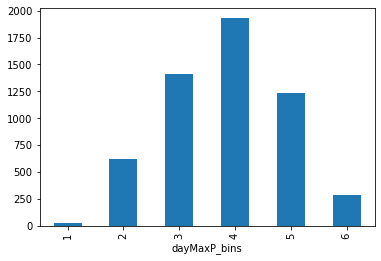

In [47]:
cnt,bins=np.histogram(df.dayMaxP, bins=6)
cnt,bins

df['dayMaxP_bins']=pd.cut(x=df.dayMaxP,bins=bins,
                     labels=['1','2','3','4','5','6'],
                     include_lowest=True)
df.dayMaxP_bins
df.groupby(['dayMaxP_bins'])['fire'].count().plot(kind='bar')

<AxesSubplot:xlabel='dayMinP_bins'>

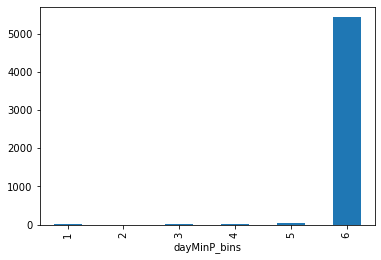

In [48]:
cnt,bins=np.histogram(df.dayMinP, bins=6)
cnt,bins

df['dayMinP_bins']=pd.cut(x=df.dayMinP,bins=bins,
                     labels=['1','2','3','4','5','6'],
                     include_lowest=True)
df.dayMinP_bins
df.groupby(['dayMinP_bins'])['fire'].count().plot(kind='bar')

<AxesSubplot:xlabel='dayAvgPsea_bins'>

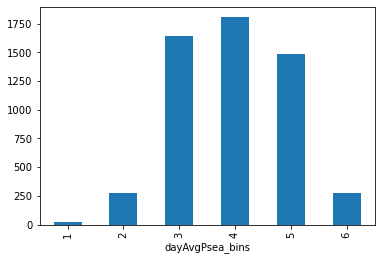

In [49]:
cnt,bins=np.histogram(df.dayAvgPsea, bins=6)
cnt,bins

df['dayAvgPsea_bins']=pd.cut(x=df.dayAvgPsea,bins=bins,
                     labels=['1','2','3','4','5','6'],
                     include_lowest=True)
df.dayAvgPsea_bins
df.groupby(['dayAvgPsea_bins'])['fire'].count().plot(kind='bar')

<AxesSubplot:xlabel='dayMaxPsea_bins'>

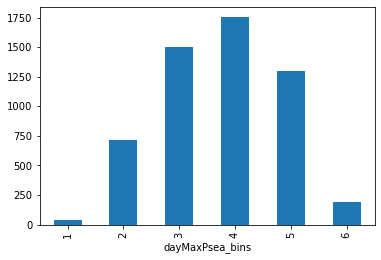

In [50]:
cnt,bins=np.histogram(df.dayMaxPsea, bins=6)
cnt,bins

df['dayMaxPsea_bins']=pd.cut(x=df.dayMaxPsea,bins=bins,
                     labels=['1','2','3','4','5','6'],
                     include_lowest=True)
df.dayMaxPsea_bins
df.groupby(['dayMaxPsea_bins'])['fire'].count().plot(kind='bar')

<AxesSubplot:xlabel='dayMinPsea_bins'>

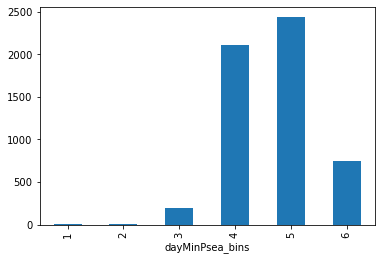

In [51]:
cnt,bins=np.histogram(df.dayMinPsea, bins=6)
cnt,bins

df['dayMinPsea_bins']=pd.cut(x=df.dayMinPsea,bins=bins,
                     labels=['1','2','3','4','5','6'],
                     include_lowest=True)
df.dayMinPsea_bins
df.groupby(['dayMinPsea_bins'])['fire'].count().plot(kind='bar')

<AxesSubplot:xlabel='dayAvgRhm_bins'>

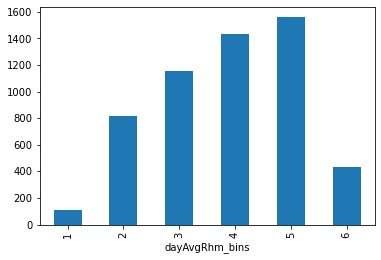

In [52]:
cnt,bins=np.histogram(df.dayAvgRhm, bins=6)
cnt,bins

df['dayAvgRhm_bins']=pd.cut(x=df.dayAvgRhm,bins=bins,
                     labels=['1','2','3','4','5','6'],
                     include_lowest=True)
df.dayAvgRhm_bins
df.groupby(['dayAvgRhm_bins'])['fire'].count().plot(kind='bar')

<AxesSubplot:xlabel='dayMinRhm_bins'>

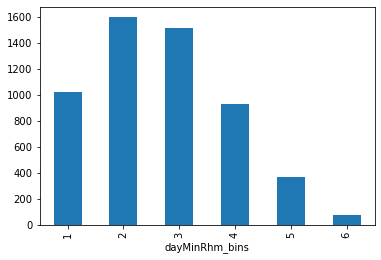

In [53]:
cnt,bins=np.histogram(df.dayMinRhm, bins=6)
cnt,bins

df['dayMinRhm_bins']=pd.cut(x=df.dayMinRhm,bins=bins,
                     labels=['1','2','3','4','5','6'],
                     include_lowest=True)
df.dayMinRhm_bins
df.groupby(['dayMinRhm_bins'])['fire'].count().plot(kind='bar')

<AxesSubplot:xlabel='dayAvgWaterP_bins'>

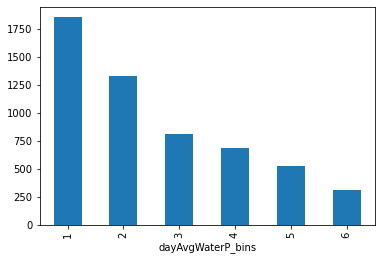

In [54]:
cnt,bins=np.histogram(df.dayAvgWaterP, bins=6)
cnt,bins

df['dayAvgWaterP_bins']=pd.cut(x=df.dayAvgWaterP,bins=bins,
                     labels=['1','2','3','4','5','6'],
                     include_lowest=True)
df.dayAvgWaterP_bins
df.groupby(['dayAvgWaterP_bins'])['fire'].count().plot(kind='bar')

<AxesSubplot:xlabel='dayMaxWaterP_bins'>

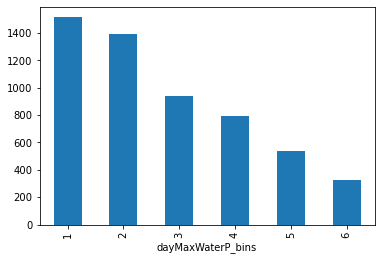

In [55]:
cnt,bins=np.histogram(df.dayMaxWaterP, bins=6)
cnt,bins

df['dayMaxWaterP_bins']=pd.cut(x=df.dayMaxWaterP,bins=bins,
                     labels=['1','2','3','4','5','6'],
                     include_lowest=True)
df.dayMaxWaterP_bins
df.groupby(['dayMaxWaterP_bins'])['fire'].count().plot(kind='bar')

<AxesSubplot:xlabel='dayMinWaterP_bins'>

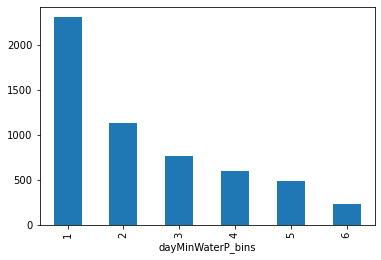

In [56]:
cnt,bins=np.histogram(df.dayMinWaterP, bins=6)
cnt,bins

df['dayMinWaterP_bins']=pd.cut(x=df.dayMinWaterP,bins=bins,
                     labels=['1','2','3','4','5','6'],
                     include_lowest=True)
df.dayMinWaterP_bins
df.groupby(['dayMinWaterP_bins'])['fire'].count().plot(kind='bar')

<AxesSubplot:xlabel='dayAvgWS_bins'>

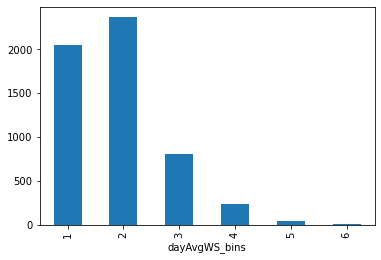

In [57]:
cnt,bins=np.histogram(df.dayAvgWS, bins=6)
cnt,bins

df['dayAvgWS_bins']=pd.cut(x=df.dayAvgWS,bins=bins,
                     labels=['1','2','3','4','5','6'],
                     include_lowest=True)
df.dayAvgWS_bins
df.groupby(['dayAvgWS_bins'])['fire'].count().plot(kind='bar')

<AxesSubplot:xlabel='dayMaxWS_bins'>

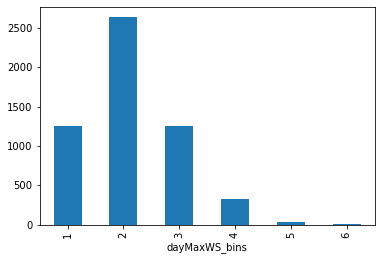

In [58]:
cnt,bins=np.histogram(df.dayMaxWS, bins=6)
cnt,bins

df['dayMaxWS_bins']=pd.cut(x=df.dayMaxWS,bins=bins,
                     labels=['1','2','3','4','5','6'],
                     include_lowest=True)
df.dayMaxWS_bins
df.groupby(['dayMaxWS_bins'])['fire'].count().plot(kind='bar')

<AxesSubplot:xlabel='dayMaxWSWD_bins'>

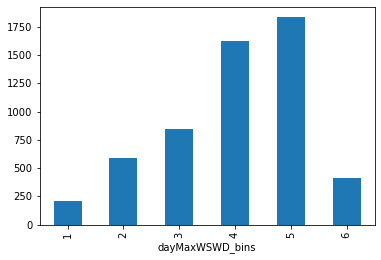

In [59]:
cnt,bins=np.histogram(df.dayMaxWSWD, bins=6)
cnt,bins

df['dayMaxWSWD_bins']=pd.cut(x=df.dayMaxWSWD,bins=bins,
                     labels=['1','2','3','4','5','6'],
                     include_lowest=True)
df.dayMaxWSWD_bins
df.groupby(['dayMaxWSWD_bins'])['fire'].count().plot(kind='bar')

<AxesSubplot:xlabel='dayMaxInsWS_bins'>

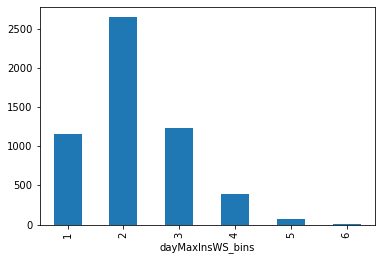

In [60]:
cnt,bins=np.histogram(df.dayMaxInsWS, bins=6)
cnt,bins

df['dayMaxInsWS_bins']=pd.cut(x=df.dayMaxInsWS,bins=bins,
                     labels=['1','2','3','4','5','6'],
                     include_lowest=True)
df.dayMaxInsWS_bins
df.groupby(['dayMaxInsWS_bins'])['fire'].count().plot(kind='bar')

<AxesSubplot:xlabel='dayMaxInsWSWD_bins'>

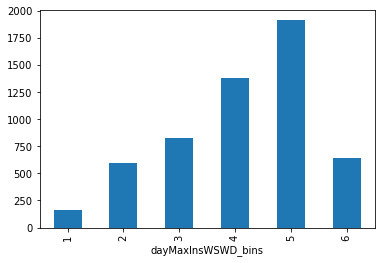

In [61]:
cnt,bins=np.histogram(df.dayMaxInsWSWD, bins=6)
cnt,bins

df['dayMaxInsWSWD_bins']=pd.cut(x=df.dayMaxInsWSWD,bins=bins,
                     labels=['1','2','3','4','5','6'],
                     include_lowest=True)
df.dayMaxInsWSWD_bins
df.groupby(['dayMaxInsWSWD_bins'])['fire'].count().plot(kind='bar')

<AxesSubplot:xlabel='hr24sumRws_bins'>

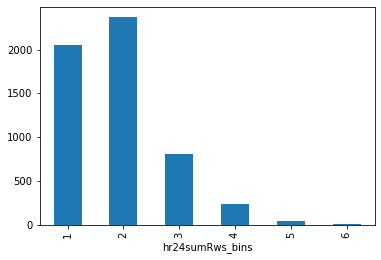

In [62]:
cnt,bins=np.histogram(df.hr24sumRws, bins=6)
cnt,bins

df['hr24sumRws_bins']=pd.cut(x=df.hr24sumRws,bins=bins,
                     labels=['1','2','3','4','5','6'],
                     include_lowest=True)
df.hr24sumRws_bins
df.groupby(['hr24sumRws_bins'])['fire'].count().plot(kind='bar')

<AxesSubplot:xlabel='dayAvgCloud_bins'>

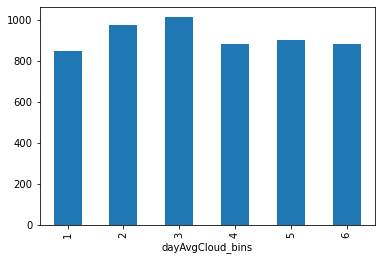

In [63]:
cnt,bins=np.histogram(df.dayAvgCloud, bins=6)
cnt,bins

df['dayAvgCloud_bins']=pd.cut(x=df.dayAvgCloud,bins=bins,
                     labels=['1','2','3','4','5','6'],
                     include_lowest=True)
df.dayAvgCloud_bins
df.groupby(['dayAvgCloud_bins'])['fire'].count().plot(kind='bar')

<AxesSubplot:xlabel='dayAvgMiddleLowCloud_bins'>

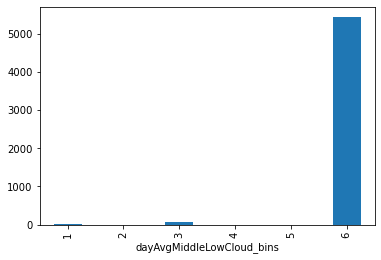

In [64]:
cnt,bins=np.histogram(df.dayAvgMiddleLowCloud, bins=6)
cnt,bins

df['dayAvgMiddleLowCloud_bins']=pd.cut(x=df.dayAvgMiddleLowCloud,bins=bins,
                     labels=['1','2','3','4','5','6'],
                     include_lowest=True)
df.dayAvgMiddleLowCloud_bins
df.groupby(['dayAvgMiddleLowCloud_bins'])['fire'].count().plot(kind='bar')

<AxesSubplot:xlabel='maxCloud_bins'>

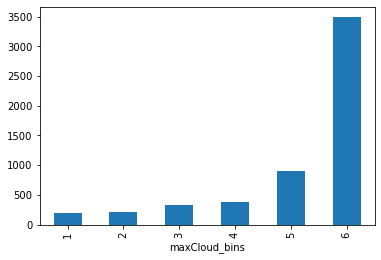

In [65]:
cnt,bins=np.histogram(df.maxCloud, bins=6)
cnt,bins

df['maxCloud_bins']=pd.cut(x=df.maxCloud,bins=bins,
                     labels=['1','2','3','4','5','6'],
                     include_lowest=True)
df.maxCloud_bins
df.groupby(['maxCloud_bins'])['fire'].count().plot(kind='bar')

<AxesSubplot:xlabel='sumSS_hr_bins'>

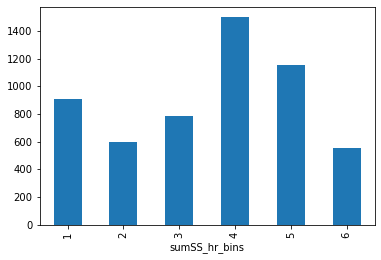

In [66]:
cnt,bins=np.histogram(df.sumSS_hr, bins=6)
cnt,bins

df['sumSS_hr_bins']=pd.cut(x=df.sumSS_hr,bins=bins,
                     labels=['1','2','3','4','5','6'],
                     include_lowest=True)
df.sumSS_hr_bins
df.groupby(['sumSS_hr_bins'])['fire'].count().plot(kind='bar')

<AxesSubplot:xlabel='daySumSunRay_bins'>

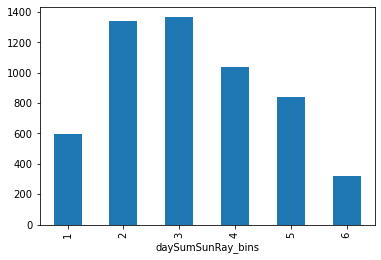

In [67]:
cnt,bins=np.histogram(df.daySumSunRay, bins=6)
cnt,bins

df['daySumSunRay_bins']=pd.cut(x=df.daySumSunRay,bins=bins,
                     labels=['1','2','3','4','5','6'],
                     include_lowest=True)
df.daySumSunRay_bins
df.groupby(['daySumSunRay_bins'])['fire'].count().plot(kind='bar')

<AxesSubplot:xlabel='dayAvgGroundT_bins'>

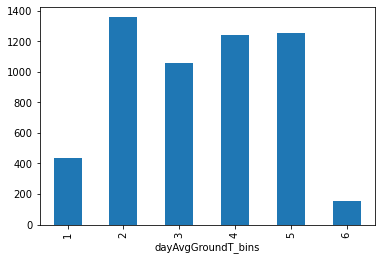

In [68]:
cnt,bins=np.histogram(df.dayAvgGroundT, bins=6)
cnt,bins

df['dayAvgGroundT_bins']=pd.cut(x=df.dayAvgGroundT,bins=bins,
                     labels=['1','2','3','4','5','6'],
                     include_lowest=True)
df.dayAvgGroundT_bins
df.groupby(['dayAvgGroundT_bins'])['fire'].count().plot(kind='bar')

<AxesSubplot:xlabel='dayAvgGroundT_bins'>

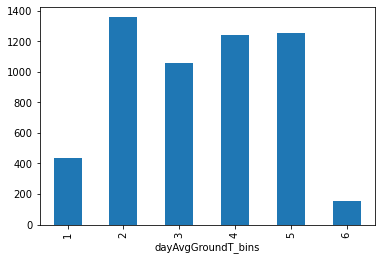

In [70]:
cnt,bins=np.histogram(df.dayAvgGroundT, bins=6)
cnt,bins

df['dayAvgGroundT_bins']=pd.cut(x=df.dayAvgGroundT,bins=bins,
                     labels=['1','2','3','4','5','6'],
                     include_lowest=True)
df.dayAvgGroundT_bins
df.groupby(['dayAvgGroundT_bins'])['fire'].count().plot(kind='bar')

In [188]:
y_data = df[['fire']] #산불발생여부
x_data = df.copy()  #그 외 모든 데이터
x_data.drop(['fire','location','Date'], axis=1, inplace=True)